# Funciones de Pérdida y Métricas

---

## **Bienvenida**

En este notebook exploraremos dos conceptos fundamentales en el entrenamiento y evaluación de modelos de aprendizaje automático: **funciones de pérdida** y **métricas de evaluación**. Estas herramientas nos permiten medir el rendimiento de nuestros modelos y ajustar sus parámetros para mejorar sus predicciones.

---

## **¿Qué aprenderás en este notebook?**

En este notebook, cubriremos los siguientes temas:

1. **Funciones de pérdida:**
   - ¿Qué son y por qué son importantes?
   - Implementación y ejemplos de funciones comunes como:
     - L1 (MAE - Mean Absolute Error)
     - L2 (MSE - Mean Squared Error)
     - Entropía cruzada (Cross-Entropy)
   - Impacto de los valores atípicos en las funciones de pérdida.

2. **Métricas de evaluación:**
   - Diferencia entre funciones de pérdida y métricas.
   - Introducción a métricas como:
     - Precisión
     - Recall
     - F1-Score
     - Accuracy
   - Implementación y ejemplos prácticos.

3. **Visualizaciones:**
   - Representaciones gráficas para comprender el comportamiento de las funciones de pérdida y métricas.

---

## **¿Por qué son importantes las funciones de pérdida y las métricas?**

### **Funciones de pérdida**
Las funciones de pérdida son fundamentales durante el entrenamiento de un modelo porque miden qué tan mal se están realizando las predicciones. Al minimizar esta pérdida, el modelo ajusta sus parámetros para mejorar su rendimiento. Cada tipo de problema tiene funciones de pérdida más adecuadas.

### **Métricas de evaluación**
Las métricas se utilizan después del entrenamiento para evaluar qué tan bien está funcionando un modelo. A diferencia de las funciones de pérdida, no se utilizan directamente para entrenar el modelo, sino para medir su rendimiento de manera más interpretativa para el usuario.

---

### **Diferencia clave entre funciones de pérdida y métricas**

| **Concepto**          | **Funciones de pérdida**                                      | **Métricas de evaluación**                      |
|------------------------|-------------------------------------------------------------|------------------------------------------------|
| **Propósito**          | Medir la calidad de las predicciones durante el entrenamiento. | Evaluar el rendimiento del modelo después del entrenamiento. |
| **Uso**               | Directamente optimizadas por el modelo.                     | No afectan directamente el entrenamiento.       |
| **Ejemplos comunes**   | MSE, MAE, Cross-Entropy.                                     | Accuracy, Precision, Recall, F1-Score.         |

---


## **Introducción a las funciones de pérdida**

Las funciones de pérdida son esenciales en el aprendizaje automático porque permiten cuantificar qué tan lejos están las predicciones de un modelo respecto a los valores reales. Son el núcleo de los algoritmos de optimización, ya que ayudan al modelo a aprender y mejorar.

En esta sección, veremos cómo las funciones de pérdida se utilizan para resolver diferentes problemas de aprendizaje. Exploraremos:

1. **MAE (Mean Absolute Error):** Ideal para problemas de regresión donde queremos minimizar las diferencias absolutas entre valores reales y predichos.
2. **MSE (Mean Squared Error):** Común en regresión, penaliza los errores grandes más que los pequeños.
3. **Entropía Cruzada (Cross-Entropy):** Usada para clasificación, mide la similitud entre probabilidades predichas y reales.

Estas herramientas son fundamentales para que el modelo "entienda" cómo ajustar sus parámetros durante el entrenamiento.

---

### **Conceptos clave antes de empezar**

#### **¿Por qué elegir una función de pérdida específica?**
- **Problemas de regresión:** Usamos MAE o MSE dependiendo de nuestra tolerancia a los valores atípicos.
- **Problemas de clasificación:** La entropía cruzada es adecuada porque trabaja directamente con probabilidades.

#### **Impacto de los valores atípicos**
- **MAE:** Menos sensible a valores atípicos, ideal para datos ruidosos.
- **MSE:** Amplifica los valores extremos, útil cuando los valores atípicos deben ser tomados en cuenta.

---

### **Definiciones y fórmulas**

#### **1. MAE (Mean Absolute Error)**

$$ MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i| $$

- **Ventaja:** Robusta frente a valores extremos.
- **Desventaja:** Menos precisa en datos con distribuciones uniformes.

#### **2. MSE (Mean Squared Error)**

$$ MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

- **Ventaja:** Penaliza más los errores grandes, útil para distribuciones normales.
- **Desventaja:** Los valores atípicos pueden sesgar los resultados.

#### **3. Entropía Cruzada (Cross-Entropy)**

$$ CE = -\frac{1}{n} \sum_{i=1}^n y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) $$

- **Ventaja:** Específica para problemas de clasificación.
- **Desventaja:** Requiere que las probabilidades predichas estén bien calibradas.

---

Ahora, vamos a implementar estas funciones para entender su impacto en datos simulados.


MAE: 1.1400000000000001
MSE: 0.026000000000000013


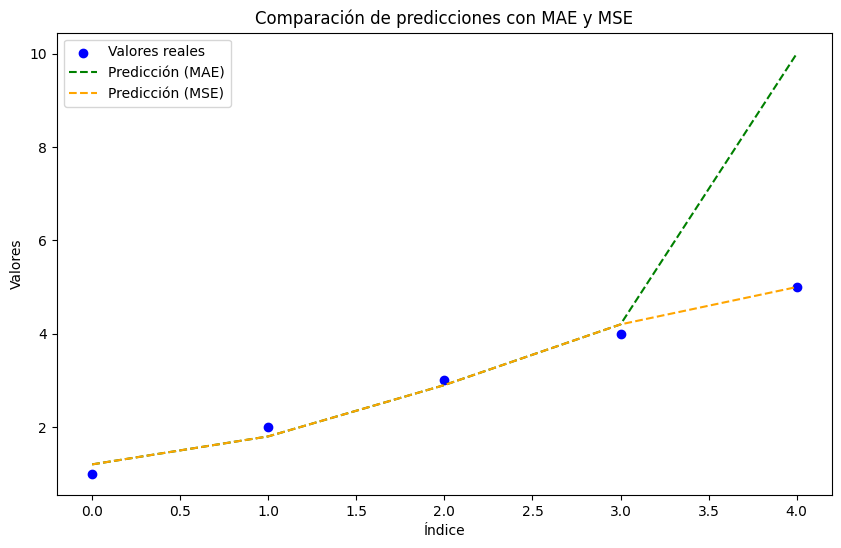

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos simulados
y_true = np.array([1, 2, 3, 4, 5])  # Valores reales
y_pred_mae = np.array([1.2, 1.8, 2.9, 4.2, 10])  # Predicciones con un valor atípico
y_pred_mse = np.array([1.2, 1.8, 2.9, 4.2, 5])   # Predicciones razonables

# Calcular MAE
mae = np.mean(np.abs(y_true - y_pred_mae))  # Diferencias absolutas
print(f"MAE: {mae}")

# Calcular MSE
mse = np.mean((y_true - y_pred_mse) ** 2)  # Diferencias al cuadrado
print(f"MSE: {mse}")

# Gráficos para visualización
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, label="Valores reales", color="blue")
plt.plot(range(len(y_pred_mae)), y_pred_mae, label="Predicción (MAE)", linestyle="--", color="green")
plt.plot(range(len(y_pred_mse)), y_pred_mse, label="Predicción (MSE)", linestyle="--", color="orange")
plt.title("Comparación de predicciones con MAE y MSE")
plt.xlabel("Índice")
plt.ylabel("Valores")
plt.legend()
plt.show()

## **Métricas de evaluación: Introducción**

Hasta ahora, hemos analizado cómo las funciones de pérdida cuantifican el error entre predicciones y valores reales. Sin embargo, las métricas de evaluación ofrecen una perspectiva adicional para medir el desempeño general de un modelo, dependiendo del problema que enfrentamos.

Para problemas de regresión, una métrica comúnmente utilizada es el coeficiente de determinación (R²), que mide la proporción de la varianza de los datos explicada por el modelo.

### **Definición de R²:**
$$ R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} $$

Donde:
- $ y_i $: Valores reales.
- $ \hat{y}_i $: Valores predichos.
- $ \bar{y} $: Media de los valores reales.

Un \( R^2 \) cercano a 1 indica que el modelo explica bien los datos, mientras que valores cercanos a 0 o negativos indican un desempeño deficiente.

Ahora implementaremos esta métrica en los datos simulados previamente:


R²: 0.9870


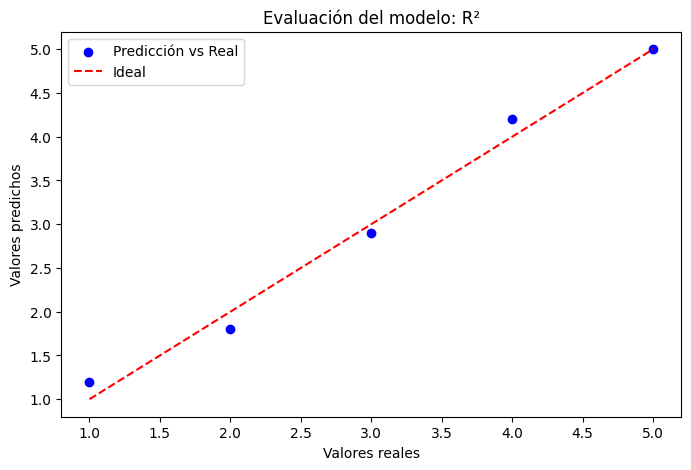

In [ ]:
# Cálculo de R²
ss_total = np.sum((y_true - np.mean(y_true)) ** 2)  # Suma total de cuadrados
ss_residual = np.sum((y_true - y_pred_mse) ** 2)   # Suma residual de cuadrados
r2 = 1 - (ss_residual / ss_total)

print(f"R²: {r2:.4f}")

# Visualización de ajuste
plt.figure(figsize=(8, 5))
plt.scatter(y_true, y_pred_mse, label="Predicción vs Real", color="blue")
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle="--", color="red", label="Ideal")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Evaluación del modelo: R²")
plt.legend()
plt.show()

## Métricas de Clasificación

Después de explorar las métricas para modelos de regresión, en esta sección abordaremos las **métricas de evaluación para problemas de clasificación**. Estas métricas son fundamentales para entender cómo de bien un modelo clasifica los datos en sus respectivas categorías.

### **¿Qué son las métricas de clasificación?**

Las métricas de clasificación nos ayudan a medir el desempeño de un modelo en términos de predicción de clases correctas. Las más comunes incluyen:

1. **Exactitud (Accuracy):** Proporción de predicciones correctas sobre el total de ejemplos.
2. **Precisión:** Mide qué tan precisas son las predicciones positivas del modelo.
3. **Sensibilidad o Recall:** Qué tan bien el modelo identifica los verdaderos positivos.
4. **F1-Score:** Promedio ponderado entre precisión y sensibilidad. Es útil cuando hay un desequilibrio en las clases.

Estas métricas se derivan de la **matriz de confusión**, una herramienta que organiza las predicciones del modelo en cuatro categorías:

| **Clase real \ Clase predicha** | Positivo | Negativo |
|---------------------------------|----------|----------|
| **Positivo**                    | TP       | FN       |
| **Negativo**                    | FP       | TN       |

### **Fórmulas de las métricas**

- **Exactitud (Accuracy):**  
  $$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$
  
- **Precisión:**  
  $$ Precision = \frac{TP}{TP + FP} $$
  
- **Sensibilidad (Recall):**  
  $$ Recall = \frac{TP}{TP + FN} $$

- **F1-Score:**  
  $$ F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $$

### **Implementación Práctica**

Para implementar estas métricas, usaremos el dataset **Iris** disponible en `sklearn`. Este conjunto de datos es ideal para practicar clasificación ya que contiene tres clases de flores y cuatro características que describen su forma.

A continuación, entrenaremos un modelo de regresión logística y evaluaremos su desempeño usando las métricas mencionadas.


Exactitud (Accuracy): 1.00
Precisión: 1.00
Sensibilidad (Recall): 1.00
F1-Score: 1.00


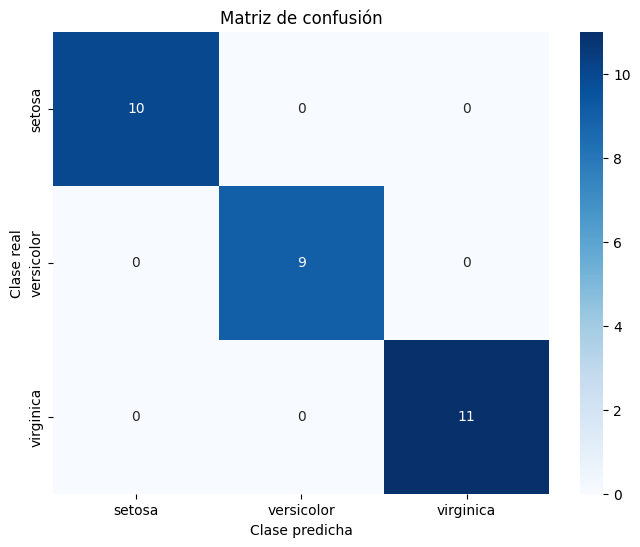

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Cargar el dataset Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Modelo de clasificación simple
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calcular métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Exactitud (Accuracy): {acc:.2f}")
print(f"Precisión: {prec:.2f}")
print(f"Sensibilidad (Recall): {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Matriz de confusión")
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.show()

### **Interpretación de los resultados**

1. **Matriz de confusión:**
   - La matriz muestra que todas las predicciones coinciden con las etiquetas reales, ya que:
     - Las instancias de la clase **setosa** fueron clasificadas correctamente (10).
     - Las instancias de la clase **versicolor** fueron clasificadas correctamente (9).
     - Las instancias de la clase **virginica** fueron clasificadas correctamente (11).
   - No hay valores fuera de la diagonal principal, lo que significa que no hubo errores de clasificación.

2. **Métricas de clasificación:**
   - **Exactitud (Accuracy):** 1.00 (100%). Esto indica que el modelo predijo correctamente todas las instancias del conjunto de datos de prueba.
   - **Precisión:** 1.00. Esto significa que todas las predicciones realizadas por el modelo fueron correctas.
   - **Sensibilidad (Recall):** 1.00. Esto refleja que el modelo identificó correctamente todas las instancias verdaderas de cada clase.
   - **F1-Score:** 1.00. Esta métrica balancea precisión y sensibilidad, confirmando que ambas están en un nivel perfecto.

---

### **Ejercicio práctico**

Para que practiques y refuerces lo aprendido, realiza el siguiente ejercicio. En esta ocasión, trabajaremos con un modelo que no necesariamente logrará métricas perfectas, para que puedas analizar resultados diversos.

#### **Objetivo**
Evaluar un modelo de clasificación utilizando un conjunto de datos con métricas que varíen entre 0 y 1.

#### **Instrucciones**
1. Carga el dataset `make_classification` de `sklearn.datasets`, generando un conjunto de datos de clasificación binaria con las siguientes características:
   - Número de muestras: 300.
   - Número de características: 5.
   - Proporción de clases desbalanceada (e.g., 70% de una clase y 30% de la otra).

2. Divide los datos en conjuntos de entrenamiento y prueba.

3. Entrena un modelo de clasificación como un **árbol de decisión** usando `sklearn.tree.DecisionTreeClassifier`.

4. Evalúa el desempeño del modelo calculando:
   - Exactitud (accuracy).
   - Precisión.
   - Sensibilidad (recall).
   - F1-Score.

5. Visualiza los resultados mediante:
   - Una matriz de confusión.
   - Una gráfica de comparación de las métricas.

#### **Tips**
- Ajusta los parámetros del generador de datos (`make_classification`) para introducir ruido en los datos y hacer que el problema sea más desafiante.
- Usa el método `plot_confusion_matrix` de `sklearn.metrics` para visualizar la matriz de confusión.

#### **Desafío adicional**
Modifica la profundidad máxima del árbol de decisión (`max_depth`) y analiza cómo impacta en las métricas de evaluación. Responde las siguientes preguntas:
- ¿Cómo afecta el desbalance en las clases al desempeño del modelo?
- ¿Qué sucede con las métricas cuando el modelo es sobreajustado o subajustado?

Este ejercicio te permitirá trabajar con un modelo que genera métricas variadas, enriqueciendo tu comprensión de las métricas y los resultados de clasificación.


Exactitud (Accuracy): 0.70
Precisión: 0.57
Sensibilidad (Recall): 0.43
F1-Score: 0.49


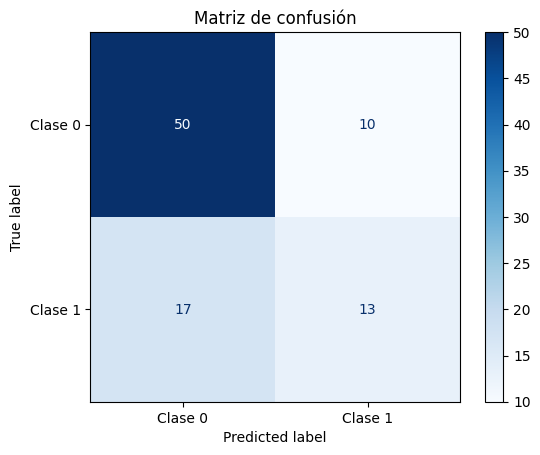

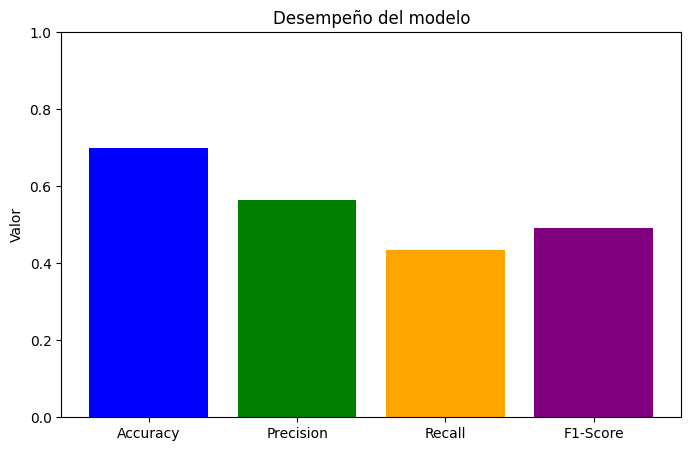

In [ ]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay,
)

# Generar un dataset de clasificación
# Creamos un conjunto de datos con desbalanceo en las clases y algo de ruido
X, y = make_classification(
    n_samples=300,           # 300 muestras
    n_features=5,            # 5 características por muestra
    n_informative=3,         # 3 características útiles para la clasificación
    n_redundant=1,           # 1 característica redundante
    n_classes=2,             # Clasificación binaria
    weights=[0.7, 0.3],      # Clases desbalanceadas (70%-30%)
    flip_y=0.1,              # Introducimos un 10% de ruido en las etiquetas
    random_state=42          # Fijar semilla para reproducibilidad
)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42  # 30% de los datos para prueba
)

# Crear y entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limitar la profundidad del árbol para evitar sobreajuste
clf.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)          # Exactitud
precision = precision_score(y_test, y_pred)       # Precisión
recall = recall_score(y_test, y_pred)             # Sensibilidad
f1 = f1_score(y_test, y_pred)                     # F1-Score

# Imprimir las métricas
print(f"Exactitud (Accuracy): {accuracy:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, display_labels=["Clase 0", "Clase 1"], cmap="Blues"
)
disp.ax_.set_title("Matriz de confusión")
plt.show()

# Visualizar las métricas en una gráfica de barras
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=["blue", "green", "orange", "purple"])
plt.ylim(0, 1)
plt.title("Desempeño del modelo")
plt.ylabel("Valor")
plt.show()

####Interpreta los resultados.

## Conclusión

En este notebook, exploramos las métricas de evaluación de modelos de clasificación y su interpretación. A través de ejemplos prácticos, analizamos cómo las métricas como la Exactitud, Precisión, Sensibilidad y F1-Score nos permiten evaluar el desempeño de un modelo desde diferentes perspectivas. Además, visualizamos estos resultados mediante gráficos y matrices de confusión, lo que facilita la comprensión del comportamiento del modelo.

### Puntos clave:
- **Exactitud** proporciona una visión general del porcentaje de predicciones correctas, pero no siempre refleja el rendimiento real cuando las clases están desbalanceadas.
- **Precisión y Sensibilidad** ofrecen información más detallada sobre el desempeño en cada clase, siendo útiles para aplicaciones específicas donde los falsos positivos o negativos tienen implicaciones críticas.
- **F1-Score** combina precisión y sensibilidad en un único valor, equilibrando su importancia.

En el ejercicio final, evaluamos un modelo con un desempeño más variado, donde ninguna métrica alcanzó el valor máximo. Esto permitió observar cómo estas métricas interactúan y reflejan diferentes aspectos del rendimiento del modelo.

Este análisis demuestra que la elección de métricas adecuadas depende del contexto y los objetivos del problema, ya que diferentes aplicaciones pueden priorizar aspectos específicos como minimizar errores de tipo I (falsos positivos) o tipo II (falsos negativos).

### Prueba experimentar con lo siguiente:
- Ajustar parámetros del modelo para mejorar su desempeño.
- Experimentar con diferentes algoritmos de clasificación.
- Analizar cómo el balanceo de clases afecta las métricas.

